## **EDA on IPL Dataset**

### **Importing libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### **Importing IPL dataset**

In [2]:
data = pd.read_csv("/content/drive/MyDrive/ipl_dataset3.csv")

In [3]:
data.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
0,1,2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong
1,2,2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi
2,3,2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan
3,4,2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin
4,5,2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,0,0


In [4]:
data.columns

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2'],
      dtype='object')

## Data Pre-processing: Finding out NaN

In [5]:
data.isna().any()

id                 False
season             False
city               False
date               False
team1              False
team2              False
toss_winner        False
toss_decision      False
result             False
dl_applied         False
winner             False
win_by_runs        False
win_by_wickets     False
player_of_match    False
venue              False
umpire1            False
umpire2            False
dtype: bool

**Statical Description of dataset**

In [6]:
data.describe()

,id,season,dl_applied,win_by_runs,win_by_wickets
count,636.000000,636.000000,636.000000,636.000000,636.000000
mean,318.500000,2012.490566,0.025157,13.682390,3.372642
std,183.741666,2.773026,0.156726,23.908877,3.420338
min,1.000000,2008.000000,0.000000,0.000000,0.000000
25%,159.750000,2010.000000,0.000000,0.000000,0.000000
50%,318.500000,2012.000000,0.000000,0.000000,4.000000
75%,477.250000,2015.000000,0.000000,20.000000,7.000000
max,636.000000,2017.000000,1.000000,146.000000,10.000000


**How many IPL seasons are we using to analyse ?**

In [7]:
data['season'].unique()

array([2017, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016])

**Which IPL team won by scoring the maximum runs ?**

In [8]:
data.iloc[data['win_by_runs'].idxmax()]

id                               44
season                         2017
city                          Delhi
date                     06-05-2017
team1                Mumbai Indians
team2              Delhi Daredevils
toss_winner        Delhi Daredevils
toss_decision                 field
result                       normal
dl_applied                        0
winner               Mumbai Indians
win_by_runs                     146
win_by_wickets                    0
player_of_match         LMP Simmons
venue              Feroz Shah Kotla
umpire1                 Nitin Menon
umpire2                   CK Nandan
Name: 43, dtype: object

Which IPL team won by consuming maximum wickets ?

In [9]:
data.iloc[data['win_by_wickets'].idxmax()]

id                                                      3
season                                               2017
city                                               Rajkot
date                                           07-04-2017
team1                                       Gujarat Lions
team2                               Kolkata Knight Riders
toss_winner                         Kolkata Knight Riders
toss_decision                                       field
result                                             normal
dl_applied                                              0
winner                              Kolkata Knight Riders
win_by_runs                                             0
win_by_wickets                                         10
player_of_match                                   CA Lynn
venue              Saurashtra Cricket Association Stadium
umpire1                                       Nitin Menon
umpire2                                         CK Nandan
Name: 2, dtype

Which IPL team won by consuming minimum wickets ?

In [10]:
data.iloc[data['win_by_wickets'].idxmin()]

id                                                         1
season                                                  2017
city                                               Hyderabad
date                                              05-04-2017
team1                                    Sunrisers Hyderabad
team2                            Royal Challengers Bangalore
toss_winner                      Royal Challengers Bangalore
toss_decision                                          field
result                                                normal
dl_applied                                                 0
winner                                   Sunrisers Hyderabad
win_by_runs                                               35
win_by_wickets                                             0
player_of_match                                 Yuvraj Singh
venue              Rajiv Gandhi International Stadium, Uppal
umpire1                                          AY Dandekar
umpire2                 

Which season consisted of the highest number of matches ever played ?

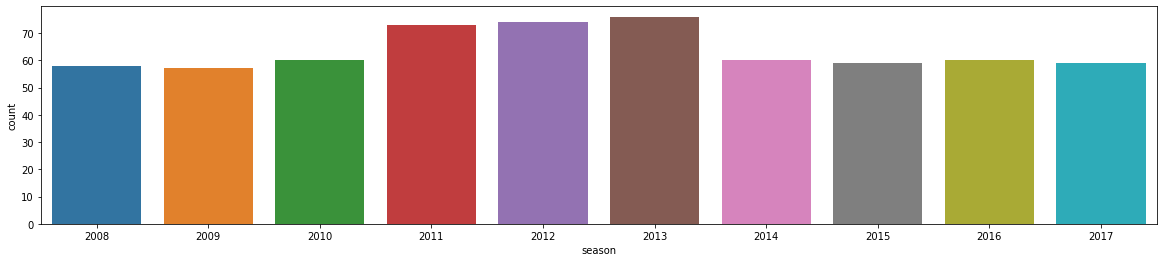

In [11]:
fig_dims = (20,4)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(x='season',ax=ax,data=data)
plt.show()

Which is the most successful IPL team with all the data at hand ?

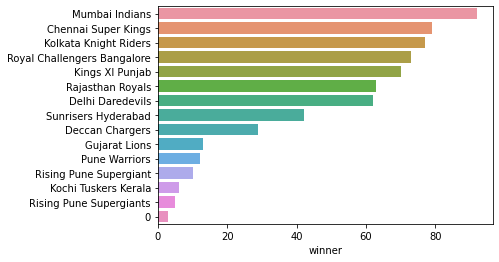

In [12]:
data1 = data.winner.value_counts()
sns.barplot(y=data1.index, x=data1)

What is the probability of winnig a match if the toss was won ?

In [13]:
probability_of_win = data['toss_winner']== data['winner']
probability_of_win.groupby(probability_of_win).size()

False    311
True     325
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


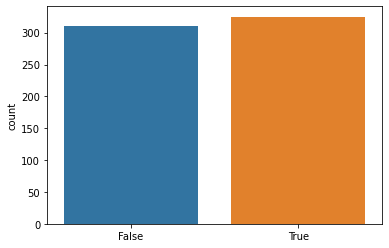

In [14]:
sns.countplot(probability_of_win)

Setting a higher row width

In [15]:
pd.set_option('max_rows',99999)
pd.set_option('max_colwidth',400)
pd.describe_option('max_colwidth')


display.max_colwidth : int or None
    The maximum width in characters of a column in the repr of
    a pandas data structure. When the column overflows, a "..."
    placeholder is embedded in the output. A 'None' value means unlimited.
    [default: 50] [currently: 400]


**Highest wins by team per season**

In [16]:
data.groupby('season')['winner'].value_counts()


season  winner                     
2008    Rajasthan Royals               13
        Kings XI Punjab                10
        Chennai Super Kings             9
        Delhi Daredevils                7
        Mumbai Indians                  7
        Kolkata Knight Riders           6
        Royal Challengers Bangalore     4
        Deccan Chargers                 2
2009    Delhi Daredevils               10
        Deccan Chargers                 9
        Royal Challengers Bangalore     9
        Chennai Super Kings             8
        Kings XI Punjab                 7
        Rajasthan Royals                6
        Mumbai Indians                  5
        Kolkata Knight Riders           3
2010    Mumbai Indians                 11
        Chennai Super Kings             9
        Deccan Chargers                 8
        Royal Challengers Bangalore     8
        Delhi Daredevils                7
        Kolkata Knight Riders           7
        Rajasthan Royals                

In [17]:
data['toss_decision'].value_counts()

field    363
bat      273
Name: toss_decision, dtype: int64

# Man of the match-Highest to lowest(in won matches)

In [18]:
data['player_of_match'].value_counts()

CH Gayle             18
YK Pathan            16
AB de Villiers       15
DA Warner            15
RG Sharma            14
SK Raina             14
G Gambhir            13
MS Dhoni             13
AM Rahane            12
MEK Hussey           12
V Kohli              11
DR Smith             11
V Sehwag             11
SR Watson            10
JH Kallis            10
KA Pollard            9
SE Marsh              9
A Mishra              9
SR Tendulkar          8
RV Uthappa            7
AT Rayudu             7
RA Jadeja             7
AC Gilchrist          7
BJ Hodge              6
M Vijay               6
A Nehra               6
AD Russell            6
UT Yadav              6
Harbhajan Singh       6
SP Narine             6
AJ Finch              5
GJ Maxwell            5
Yuvraj Singh          5
SC Ganguly            5
Sandeep Sharma        5
B Kumar               5
KC Sangakkara         5
DPMD Jayawardene      5
BB McCullum           5
DW Steyn              5
SL Malinga            5
JP Faulkner     

**In which city were the number of matches played ?**

In [19]:
data['city'].value_counts()

Mumbai            85
Bangalore         66
Kolkata           61
Delhi             60
Hyderabad         49
Chennai           48
Chandigarh        46
Jaipur            33
Pune              32
Durban            15
Ahmedabad         12
Centurion         12
Visakhapatnam     11
Rajkot            10
Dharamsala         9
Johannesburg       8
Cuttack            7
Cape Town          7
0                  7
Abu Dhabi          7
Ranchi             7
Port Elizabeth     7
Raipur             6
Sharjah            6
Kochi              5
Indore             5
Kanpur             4
Nagpur             3
East London        3
Kimberley          3
Bloemfontein       2
Name: city, dtype: int64